<a href="https://colab.research.google.com/github/zuobinxiong/CS789/blob/main/Lab1_DP%2BML_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generating a simple dataset

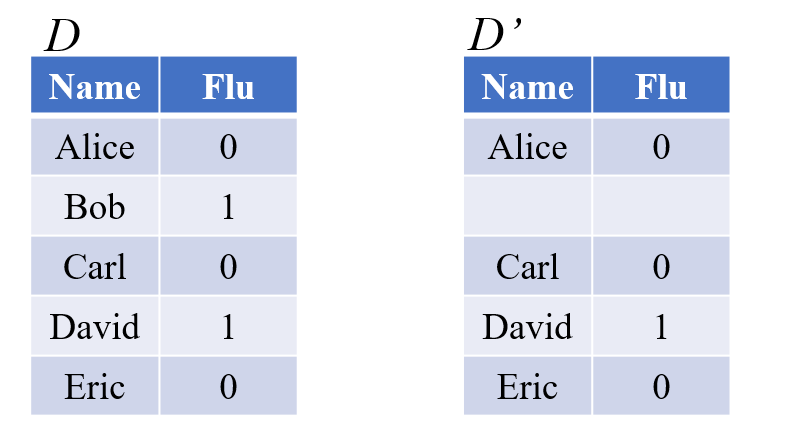

In [ ]:
import torch

In [ ]:
# the number of data sampels in the dataset
num_entries=5000

db=torch.rand(num_entries)>0.5
len(db)

5000

In [ ]:
# the generated dataset with 5000 entry
db=db.int()
db

tensor([0, 0, 1,  ..., 0, 0, 1], dtype=torch.int32)

In [ ]:
db.shape

torch.Size([5000])

# 2. Generating neighboring dataset, removing one entry from original dataset


In [ ]:
remove_index=4

In [ ]:
def get_parallel_db(db, remove_index):
    return torch.cat((db[0:remove_index],
                     db[remove_index+1:]))

In [ ]:
get_parallel_db(db,remove_index)

tensor([0, 0, 1,  ..., 0, 0, 1], dtype=torch.int32)

In [ ]:
# generate one neighboring dataset removing idx=4
pdb=get_parallel_db(db, remove_index)
pdb.shape

torch.Size([4999])

# 3. Generate all neighboring datasets of a specific dataset

In [ ]:
def get_parallel_dbs(db):
    '''
    # Insert your code here, generating all neighboring datasets of db
    '''
    return parallel_dbs

In [ ]:
pdbs=get_parallel_dbs(db)
pdbs

In [ ]:
def create_db_and_parallels(num_entries):
    db=torch.rand(num_entries) > 0.5
    pdbs=get_parallel_dbs(db)
    return db, pdbs

In [ ]:
db,pdbs=create_db_and_parallels(20)

In [ ]:
db,pdbs

# 4. Performing a differencing attack on row 10

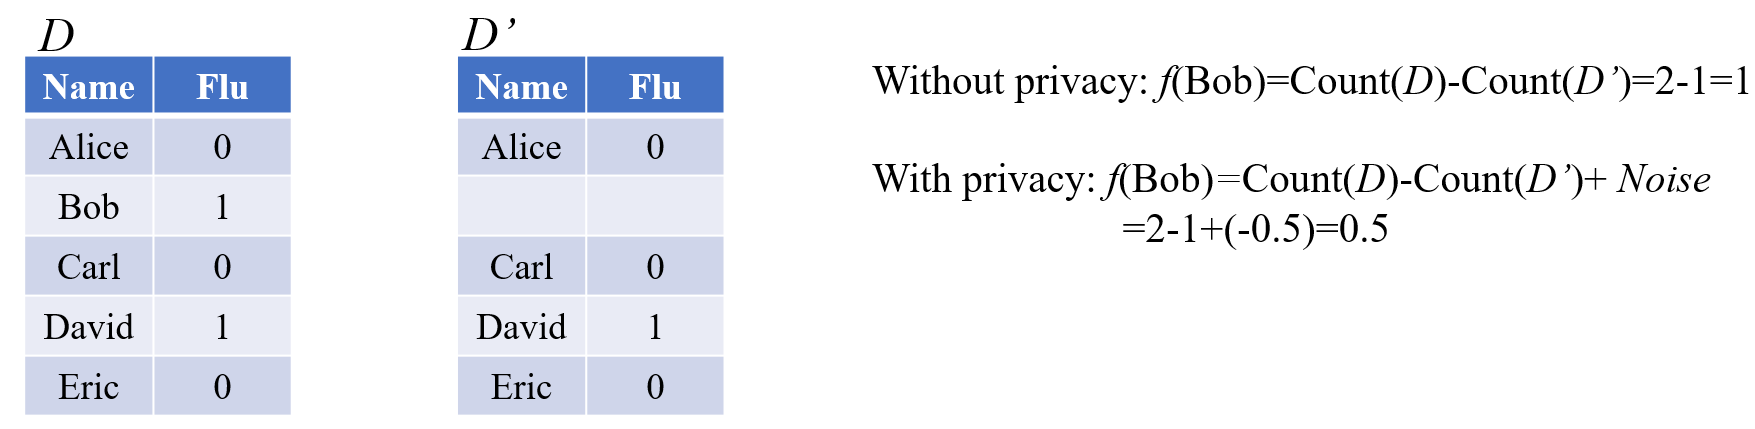

adsd

In [ ]:
db,pdbs=create_db_and_parallels(100)

In [ ]:
# private value of the 10th client
db[10]

tensor(1, dtype=torch.int32)

In [ ]:
# neighboring dataset with 10th clients is removed
db_wo10=pdbs[10]

In [ ]:
db_wo10.shape

torch.Size([99])

In [ ]:
thres=sum(db)

In [ ]:
# differencing attack using sum query
sum(db) - sum(db_wo10)

tensor(1, dtype=torch.int32)

In [ ]:
# differencing attack using mean query
'''
# Insert your code, attack with mean query

'''

tensor(0.0041)

In [ ]:
# differencing attack using threshold query
'''
# Insert your code, attack with threshold
'''

tensor(False)

## Sensitivity calculation

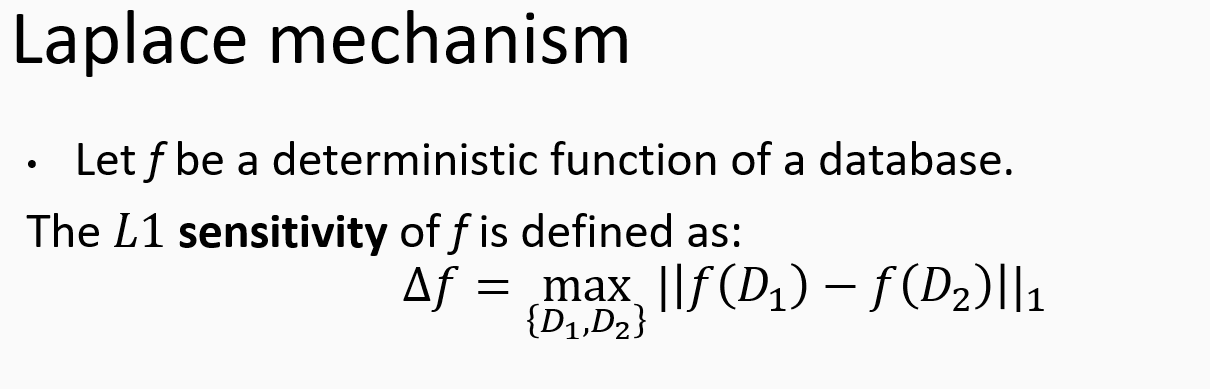

In [ ]:
def query(db):
    return db.sum()

In [ ]:
# sensitivity of query
s=torch.abs(query(db)-query(db_wo10))
s

tensor(1)

Sensitivity is defined as the max distance between f(D)-f(D')

In [ ]:
def sensitivity(query,num_entries=1000):
    db,pdbs=create_db_and_parallels(100)
    full_db_result = query(db)
    max_distance=0
    '''
    # Insert your code to calculate sensitivity

    '''

    return max_distance

In [ ]:
sensitivity(query)

tensor(1)

## Create a differentially private query

In [ ]:
epsilon = 10

In [ ]:
import numpy as np

In [ ]:
db,pdbs=create_db_and_parallels(100)

In [ ]:
def query(db):
    return db.sum()

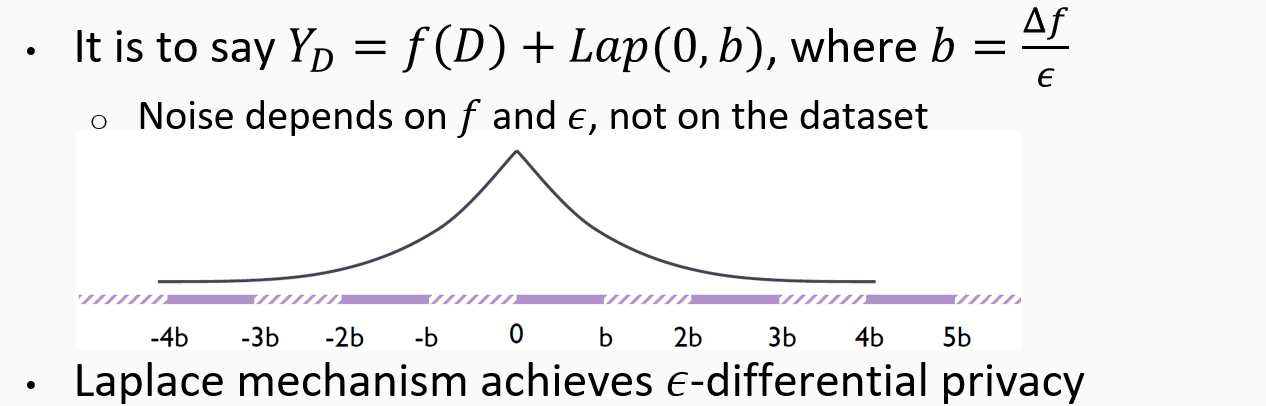

In [ ]:
def lap_mechanism(db, query, sensitivity):
    beta = sensitivity / epsilon
    '''
    # Insert your code, adding laplacian moise on query output

    '''

    return query(db) +noise

In [ ]:
query(db)

tensor(47)

In [ ]:
lap_mechanism(db, query, sensitivity(query))

tensor([46.9573], dtype=torch.float64)

In [ ]:
def mean_query(db):
    return torch.mean(db.float())

In [ ]:
mean_query(db)

tensor(0.4700)

In [ ]:
# use laplace mechanism to protect mean query

'''
# Insert your code here

'''

tensor([0.4690], dtype=torch.float64)

# Train a differnetially private ML model on MNIST dataset

In [ ]:
# import some useful libs
! pip install opacus

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
from opacus import PrivacyEngine
from tqdm import tqdm

important parameters, privacy loss, gradient bound, learning rate...

In [ ]:
MAX_GRAD_NORM = 1.2
EPSILON = 5.0
DELTA = 1e-5
EPOCHS = 20
BATCH_SIZE = 512
MAX_PHYSICAL_BATCH_SIZE = 128
LR = 1e-3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist',
			   train=True, download=True,
               transform=transforms.Compose([transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,)),]),),
               batch_size=BATCH_SIZE, shuffle=True, num_workers=1,
               pin_memory=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist',
			  train=False,
              transform=transforms.Compose([transforms.ToTensor(),
              transforms.Normalize((0.1307,), (0.3081,)),]),),
              batch_size=BATCH_SIZE, shuffle=True, num_workers=1,
              pin_memory=True)

Define model

In [ ]:
model = torch.nn.Sequential(torch.nn.Conv2d(1, 16, 8, 2, padding=3),
							torch.nn.ReLU(),
                            torch.nn.MaxPool2d(2, 1),
                            torch.nn.Conv2d(16, 32, 4, 2),
                            torch.nn.ReLU(),
                            torch.nn.MaxPool2d(2, 1),
                            torch.nn.Flatten(),
                            torch.nn.Linear(32 * 4 * 4, 32),
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 10))

model=model.to(device)


Define loss functions and optimizaion method

In [ ]:
'''
# Define criterion (cross-entropy loss) and optimizer (can be SGD, or others)
criterion =
optimizer =

'''

In [ ]:
def accuracy(preds, labels):
    return (preds == labels).mean()

In [ ]:
# Training code for an non-private model
def train(model, train_loader, optimizer, epoch, device, delta):
    model.train()

    losses = []
    top1_acc = []
    for _batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        preds = np.argmax(output.detach().cpu().numpy(), axis=1)
        labels = target.detach().cpu().numpy()

        # measure accuracy and record loss
        acc = accuracy(preds, labels)
        top1_acc.append(acc)

    # epsilon = privacy_engine.get_epsilon(DELTA)

    print(
                    f"\tTrain Epoch: {epoch} \t"
                    f"Loss: {np.mean(losses):.6f} "
                    f"Acc@1: {np.mean(top1_acc) * 100:.6f} "
                )

In [ ]:
for epoch in range(1, 11):
    train(model, train_loader, optimizer, epoch, device="cuda", delta=1e-5)

100%|██████████| 118/118 [00:14<00:00,  7.96it/s]


	Train Epoch: 1 	Loss: 1.247755 Acc@1: 63.070489 


100%|██████████| 118/118 [00:14<00:00,  8.21it/s]


	Train Epoch: 2 	Loss: 0.235949 Acc@1: 92.632195 


100%|██████████| 118/118 [00:13<00:00,  8.72it/s]


	Train Epoch: 3 	Loss: 0.153873 Acc@1: 95.227534 


100%|██████████| 118/118 [00:13<00:00,  8.52it/s]


	Train Epoch: 4 	Loss: 0.122563 Acc@1: 96.212924 


100%|██████████| 118/118 [00:13<00:00,  8.74it/s]


	Train Epoch: 5 	Loss: 0.102202 Acc@1: 96.826999 


100%|██████████| 118/118 [00:13<00:00,  8.71it/s]


	Train Epoch: 6 	Loss: 0.088238 Acc@1: 97.236383 


100%|██████████| 118/118 [00:13<00:00,  8.48it/s]


	Train Epoch: 7 	Loss: 0.081446 Acc@1: 97.496800 


100%|██████████| 118/118 [00:13<00:00,  8.58it/s]


	Train Epoch: 8 	Loss: 0.070821 Acc@1: 97.786458 


100%|██████████| 118/118 [00:14<00:00,  8.39it/s]


	Train Epoch: 9 	Loss: 0.175094 Acc@1: 95.422846 


100%|██████████| 118/118 [00:14<00:00,  8.30it/s]

	Train Epoch: 10 	Loss: 0.073026 Acc@1: 97.716940 


## a differential privacy warpper, can help you calculate gradient bound and add noise

In [ ]:
privacy_engine = PrivacyEngine()

model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
    module=model,
    optimizer=optimizer,
    data_loader=train_loader,
    epochs=EPOCHS,
    target_epsilon=EPSILON,
    target_delta=DELTA,
    max_grad_norm=MAX_GRAD_NORM,
)

# do the same training process on the private wrapper model

In [ ]:
model_dp = torch.nn.Sequential(torch.nn.Conv2d(1, 16, 8, 2, padding=3),
							torch.nn.ReLU(),
                            torch.nn.MaxPool2d(2, 1),
                            torch.nn.Conv2d(16, 32, 4, 2),
                            torch.nn.ReLU(),
                            torch.nn.MaxPool2d(2, 1),
                            torch.nn.Flatten(),
                            torch.nn.Linear(32 * 4 * 4, 32),
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 10))

model_dp=model_dp.to(device)

In [ ]:
def train(model, train_loader, optimizer, epoch, device, delta):
    model.train()

    losses = []
    top1_acc = []
    for _batch_idx, (data, target) in enumerate(tqdm(train_loader)):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        preds = np.argmax(output.detach().cpu().numpy(), axis=1)
        labels = target.detach().cpu().numpy()

        # measure accuracy and record loss
        acc = accuracy(preds, labels)
        top1_acc.append(acc)

    epsilon = privacy_engine.get_epsilon(DELTA)

    print(
                    f"\tTrain Epoch: {epoch} \t"
                    f"Loss: {np.mean(losses):.6f} "
                    f"Acc@1: {np.mean(top1_acc) * 100:.6f} "
                    f"(ε = {epsilon:.2f}, δ = {DELTA})"
                )

In [ ]:
for epoch in range(1, 11):
    train(model_dp, train_loader, optimizer, epoch, device, delta=1e-5)

100%|██████████| 118/118 [00:15<00:00,  7.53it/s]


	Train Epoch: 1 	Loss: 0.071343 Acc@1: 97.976784 (ε = 1.90, δ = 1e-05)


100%|██████████| 118/118 [00:16<00:00,  7.27it/s]


	Train Epoch: 2 	Loss: 0.073125 Acc@1: 98.044612 (ε = 2.23, δ = 1e-05)


100%|██████████| 118/118 [00:17<00:00,  6.82it/s]


	Train Epoch: 3 	Loss: 0.074561 Acc@1: 97.969852 (ε = 2.48, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.58it/s]


	Train Epoch: 4 	Loss: 0.075272 Acc@1: 98.002769 (ε = 2.70, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.70it/s]


	Train Epoch: 5 	Loss: 0.078731 Acc@1: 97.936299 (ε = 2.89, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.86it/s]


	Train Epoch: 6 	Loss: 0.077791 Acc@1: 97.968508 (ε = 3.07, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.83it/s]


	Train Epoch: 7 	Loss: 0.074476 Acc@1: 98.008378 (ε = 3.25, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.71it/s]


	Train Epoch: 8 	Loss: 0.077310 Acc@1: 97.899866 (ε = 3.41, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.49it/s]


	Train Epoch: 9 	Loss: 0.074932 Acc@1: 98.046191 (ε = 3.56, δ = 1e-05)


100%|██████████| 118/118 [00:15<00:00,  7.47it/s]


	Train Epoch: 10 	Loss: 0.078090 Acc@1: 97.999035 (ε = 3.71, δ = 1e-05)


In [ ]:
def test(model, test_loader, device):
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    losses = []
    top1_acc = []

    with torch.no_grad():
        for images, target in test_loader:
            images = images.to(device)
            target = target.to(device)

            output = model(images)
            loss = criterion(output, target)
            preds = np.argmax(output.detach().cpu().numpy(), axis=1)
            labels = target.detach().cpu().numpy()
            acc = accuracy(preds, labels)

            losses.append(loss.item())
            top1_acc.append(acc)

    top1_avg = np.mean(top1_acc)

    print(
        f"\tTest set:"
        f"Loss: {np.mean(losses):.6f} "
        f"Acc: {top1_avg * 100:.6f} "
    )
    return np.mean(top1_acc)

In [ ]:
top1_acc = test(model, test_loader, device)

In [ ]:
'''
# Insert your code, use 2 different epsilon, train 2 DP models, plot their accuracy curve (x-axis=training epoch, y-axis=accuracy, legend=epsilon)

'''

# Another application of differnetial privacy

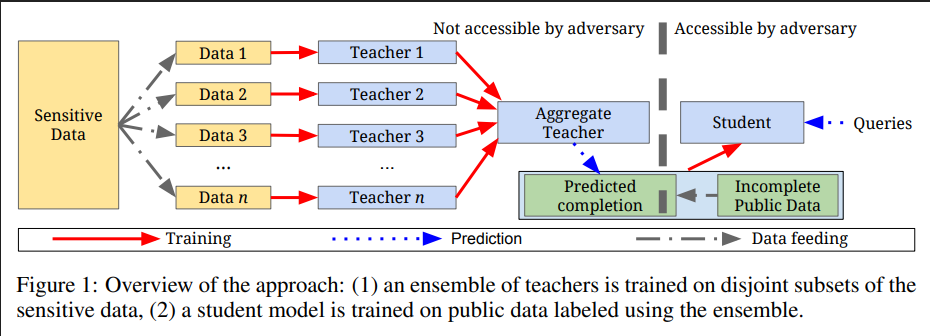

In [ ]:
import torch

from torchvision import datasets, transforms
from torch.utils.data import Subset

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.SVHN('datasets/SVHN/train/', split='train', transform=transform,
                                 target_transform=None, download=True)
test_data = datasets.SVHN('datasets/SVHN/test/', split='test', transform=transform,
                               target_transform=None, download=True)

num_teachers = 10
batch_size = 50

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)



def get_data_loaders(train_data, num_teachers):
    """ Function to create data loaders for the Teacher classifier """
    teacher_loaders = []

    '''
    # Insert your code, make a list of data_loaders (10 in our case),


    '''

    return teacher_loaders

teacher_loaders = get_data_loaders(train_data, num_teachers)

Using downloaded and verified file: datasets/SVHN/train/train_32x32.mat
Using downloaded and verified file: datasets/SVHN/test/test_32x32.mat


In [ ]:
test_loader

In [ ]:
student_train_data = Subset(test_data, list(range(9000)))
student_test_data = Subset(test_data, list(range(9000, 10000)))

student_train_loader = torch.utils.data.DataLoader(student_train_data, batch_size=batch_size)
student_test_loader = torch.utils.data.DataLoader(student_test_data, batch_size=batch_size)

Define a teacher model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

class Classifier(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(5*10*10, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), 5*10*10)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

train teacher model

In [ ]:
def train(model, trainloader, criterion, optimizer, epochs=2):
    running_loss = 0
    for e in range(epochs):
        model.train()
        for _batch_idx, (images, labels) in enumerate(tqdm(trainloader)):
        # for images, labels in trainloader:
            optimizer.zero_grad()
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        acc = test_acc(model, test_loader)
        print(f"finish training {e}-th epoch, accuracy is {acc*100}\%")

use teacher model to predict

In [ ]:
def test_acc(model, dataloader):
    outputs = torch.zeros(0, dtype=torch.long)
    model.eval()
    top1_acc = []
    for images, labels in dataloader:
        output = model.forward(images)
        ps = torch.argmax(torch.exp(output), dim=1)
        # outputs = torch.cat((outputs, ps))
        acc = (ps == labels).float().mean()
        top1_acc.append(acc)
        avg_acc = np.mean(top1_acc)

    return avg_acc

In [ ]:
def train_models(num_teachers):
    models = []
    for i in range(num_teachers):
        model = Classifier()
        criterion = nn.NLLLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.003)
        train(model, teacher_loaders[i], criterion, optimizer)
        models.append(model)
        print(f"finish teacher {i}-th training")
    return models

models = train_models(num_teachers)

  0%|          | 0/147 [00:00<?, ?it/s]<ipython-input-35-ef93c910c6f6>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
100%|██████████| 147/147 [00:06<00:00, 23.20it/s]


finish training 0-th epoch, accuracy is 20.362764596939087\%


100%|██████████| 147/147 [00:05<00:00, 27.87it/s]


finish training 1-th epoch, accuracy is 46.67562544345856\%


100%|██████████| 147/147 [00:04<00:00, 36.62it/s]


finish training 2-th epoch, accuracy is 61.73992156982422\%


100%|██████████| 147/147 [00:03<00:00, 37.42it/s]


finish training 3-th epoch, accuracy is 66.8469250202179\%


100%|██████████| 147/147 [00:04<00:00, 30.71it/s]


finish training 4-th epoch, accuracy is 70.66265940666199\%
finish teacher 0-th training


100%|██████████| 147/147 [00:06<00:00, 23.59it/s]


finish training 0-th epoch, accuracy is 37.07126080989838\%


100%|██████████| 147/147 [00:07<00:00, 20.12it/s]


finish training 1-th epoch, accuracy is 60.8476459980011\%


100%|██████████| 147/147 [00:05<00:00, 28.89it/s]


finish training 2-th epoch, accuracy is 70.32821774482727\%


100%|██████████| 147/147 [00:04<00:00, 32.47it/s]


finish training 3-th epoch, accuracy is 71.95201516151428\%


100%|██████████| 147/147 [00:04<00:00, 36.10it/s]


finish training 4-th epoch, accuracy is 75.12499690055847\%
finish teacher 1-th training


100%|██████████| 147/147 [00:05<00:00, 26.22it/s]


finish training 0-th epoch, accuracy is 19.58901286125183\%


100%|██████████| 147/147 [00:05<00:00, 24.69it/s]


finish training 1-th epoch, accuracy is 46.327972412109375\%


100%|██████████| 147/147 [00:06<00:00, 22.28it/s]


finish training 2-th epoch, accuracy is 56.12500309944153\%


100%|██████████| 147/147 [00:04<00:00, 31.44it/s]


finish training 3-th epoch, accuracy is 69.29726004600525\%


100%|██████████| 147/147 [00:04<00:00, 36.43it/s]


finish training 4-th epoch, accuracy is 70.70273756980896\%
finish teacher 2-th training


100%|██████████| 147/147 [00:04<00:00, 35.65it/s]


finish training 0-th epoch, accuracy is 19.748561084270477\%


100%|██████████| 147/147 [00:05<00:00, 27.50it/s]


finish training 1-th epoch, accuracy is 38.60173225402832\%


100%|██████████| 147/147 [00:06<00:00, 23.31it/s]


finish training 2-th epoch, accuracy is 58.21760892868042\%


100%|██████████| 147/147 [00:07<00:00, 19.38it/s]


finish training 3-th epoch, accuracy is 65.07893204689026\%


100%|██████████| 147/147 [00:06<00:00, 23.40it/s]


finish training 4-th epoch, accuracy is 66.08205437660217\%
finish teacher 3-th training


100%|██████████| 147/147 [00:05<00:00, 29.19it/s]


finish training 0-th epoch, accuracy is 19.58901286125183\%


100%|██████████| 147/147 [00:06<00:00, 23.07it/s]


finish training 1-th epoch, accuracy is 27.48800218105316\%


100%|██████████| 147/147 [00:04<00:00, 35.66it/s]


finish training 2-th epoch, accuracy is 55.896830558776855\%


100%|██████████| 147/147 [00:04<00:00, 34.33it/s]


finish training 3-th epoch, accuracy is 64.3342137336731\%


100%|██████████| 147/147 [00:05<00:00, 28.45it/s]


finish training 4-th epoch, accuracy is 68.65451335906982\%
finish teacher 4-th training


100%|██████████| 147/147 [00:07<00:00, 19.97it/s]


finish training 0-th epoch, accuracy is 24.055662751197815\%


100%|██████████| 147/147 [00:06<00:00, 23.53it/s]


finish training 1-th epoch, accuracy is 55.16963005065918\%


100%|██████████| 147/147 [00:04<00:00, 31.31it/s]


finish training 2-th epoch, accuracy is 64.28550481796265\%


100%|██████████| 147/147 [00:04<00:00, 34.39it/s]


finish training 3-th epoch, accuracy is 69.51823234558105\%


100%|██████████| 147/147 [00:06<00:00, 22.24it/s]


finish training 4-th epoch, accuracy is 70.92154622077942\%
finish teacher 5-th training


100%|██████████| 147/147 [00:04<00:00, 35.49it/s]


finish training 0-th epoch, accuracy is 23.706334829330444\%


100%|██████████| 147/147 [00:05<00:00, 26.27it/s]


finish training 1-th epoch, accuracy is 49.65930879116058\%


100%|██████████| 147/147 [00:06<00:00, 22.49it/s]


finish training 2-th epoch, accuracy is 60.97264289855957\%


100%|██████████| 147/147 [00:05<00:00, 24.89it/s]


finish training 3-th epoch, accuracy is 66.22888445854187\%


100%|██████████| 147/147 [00:04<00:00, 32.94it/s]


finish training 4-th epoch, accuracy is 69.46617364883423\%
finish teacher 6-th training


100%|██████████| 147/147 [00:04<00:00, 34.26it/s]


finish training 0-th epoch, accuracy is 19.58901286125183\%


100%|██████████| 147/147 [00:04<00:00, 34.98it/s]


finish training 1-th epoch, accuracy is 38.38123679161072\%


100%|██████████| 147/147 [00:06<00:00, 23.64it/s]


finish training 2-th epoch, accuracy is 54.04270887374878\%


100%|██████████| 147/147 [00:08<00:00, 17.00it/s]


finish training 3-th epoch, accuracy is 62.65522241592407\%


100%|██████████| 147/147 [00:04<00:00, 31.72it/s]


finish training 4-th epoch, accuracy is 68.3354139328003\%
finish teacher 7-th training


100%|██████████| 147/147 [00:04<00:00, 36.21it/s]


finish training 0-th epoch, accuracy is 45.22792994976044\%


100%|██████████| 147/147 [00:05<00:00, 25.78it/s]


finish training 1-th epoch, accuracy is 63.189780712127686\%


100%|██████████| 147/147 [00:04<00:00, 32.15it/s]


finish training 2-th epoch, accuracy is 70.23776173591614\%


100%|██████████| 147/147 [00:06<00:00, 23.01it/s]


finish training 3-th epoch, accuracy is 73.78575205802917\%


100%|██████████| 147/147 [00:06<00:00, 24.05it/s]


finish training 4-th epoch, accuracy is 74.99279379844666\%
finish teacher 8-th training


100%|██████████| 147/147 [00:04<00:00, 34.68it/s]


finish training 0-th epoch, accuracy is 19.58901286125183\%


100%|██████████| 147/147 [00:04<00:00, 35.22it/s]


finish training 1-th epoch, accuracy is 41.24280512332916\%


100%|██████████| 147/147 [00:04<00:00, 34.02it/s]


finish training 2-th epoch, accuracy is 57.96089172363281\%


100%|██████████| 147/147 [00:05<00:00, 28.11it/s]


finish training 3-th epoch, accuracy is 67.25887656211853\%


100%|██████████| 147/147 [00:06<00:00, 22.86it/s]


finish training 4-th epoch, accuracy is 73.2192873954773\%
finish teacher 9-th training


In [ ]:
def predict(model, dataloader):
    outputs = torch.zeros(0, dtype=torch.long)
    model.eval()

    for images, labels in dataloader:
        output = model.forward(images)
        ps = torch.argmax(torch.exp(output), dim=1)
        outputs = torch.cat((outputs, ps))

    return outputs

## hint for adding noise on counts

In [ ]:
count_example=np.array([1,2,2,2,1,3,2,2,2,2])

In [ ]:
label_counts = np.bincount(count_example, minlength=10)
label_counts

array([0, 2, 7, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(label_counts)

2

Generating noisy count for each teacher

In [ ]:
import numpy as np

epsilon = 0.5
def aggregated_teacher(models, dataloader, epsilon):

    preds = torch.torch.zeros((len(models), 9000), dtype=torch.long)
    for i, model in enumerate(models):
        results = predict(model, dataloader)
        preds[i] = results # prediction result from one teacher, 9000 labels

    labels = np.array([]).astype(int)
    '''
    # Insert your code, add noise on each count_sample of the 9000 samples


    '''

    return preds.numpy(), labels



<ipython-input-35-ef93c910c6f6>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [ ]:
teacher_models = models

preds, student_labels = aggregated_teacher(teacher_models, student_train_loader, epsilon)

In [ ]:
student_labels.shape

(9000,)

In [ ]:
def student_loader(student_train_loader, labels):
    for i, (data, _) in enumerate(iter(student_train_loader)):
        yield data, torch.from_numpy(labels[i*len(data): (i+1)*len(data)])
student_model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(student_model.parameters(), lr=0.003)
epochs = 10
steps = 0
running_loss = 0


for e in range(epochs):
    student_model.train()
    train_loader = student_loader(student_train_loader, student_labels)
    for images, labels in train_loader:
        steps += 1

        optimizer.zero_grad()
        output = student_model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % 50 == 0:
            test_loss = 0
            accuracy = 0
            student_model.eval()
            with torch.no_grad():
                for images, labels in student_test_loader:
                    log_ps = student_model(images)
                    test_loss += criterion(log_ps, labels).item()

                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor))
            student_model.train()
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Train Loss: {:.3f}.. ".format(running_loss/len(student_train_loader)),
                  "Test Loss: {:.3f}.. ".format(test_loss/len(student_test_loader)),
                  "Accuracy: {:.3f}".format(accuracy/len(student_test_loader)))
            running_loss = 0

<ipython-input-35-ef93c910c6f6>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch: 1/10..  Train Loss: 0.618..  Test Loss: 2.216..  Accuracy: 0.217
Epoch: 1/10..  Train Loss: 0.604..  Test Loss: 2.194..  Accuracy: 0.217
Epoch: 1/10..  Train Loss: 0.592..  Test Loss: 2.127..  Accuracy: 0.273
Epoch: 2/10..  Train Loss: 0.564..  Test Loss: 2.012..  Accuracy: 0.340
Epoch: 2/10..  Train Loss: 0.519..  Test Loss: 1.663..  Accuracy: 0.441
Epoch: 2/10..  Train Loss: 0.461..  Test Loss: 1.472..  Accuracy: 0.518
Epoch: 2/10..  Train Loss: 0.410..  Test Loss: 1.332..  Accuracy: 0.590
Epoch: 3/10..  Train Loss: 0.392..  Test Loss: 1.214..  Accuracy: 0.628
Epoch: 3/10..  Train Loss: 0.355..  Test Loss: 1.134..  Accuracy: 0.650
Epoch: 3/10..  Train Loss: 0.327..  Test Loss: 1.074..  Accuracy: 0.656
Epoch: 4/10..  Train Loss: 0.334..  Test Loss: 1.051..  Accuracy: 0.689
Epoch: 4/10..  Train Loss: 0.322..  Test Loss: 1.056..  Accuracy: 0.667
Epoch: 4/10..  Train Loss: 0.297..  Test Loss: 1.028..  Accuracy: 0.692
Epoch: 4/10..  Train Loss: 0.277..  Test Loss: 0.992..  Accuracy

In [ ]:
import pate

In [ ]:
data_dep_eps, data_ind_eps = pate.perform_analysis(teacher_preds=preds, indices=student_labels, noise_eps=epsilon, delta=1e-5)
print("Data Independent Epsilon:", data_ind_eps)
print("Data Dependent Epsilon:", data_dep_eps)

In [ ]:
syft.__version__

'0.8.1'